   # Product Recommendation System Using Sentiment Analysis

E-commerce and retail companies are utilising the power of data and boosting sales by implementing recommender systems on their websites. The use cases of these systems have been steadily increasing in the last few years and it’s a great time to explore more into some of these machine learning techniques for recommendation systems.

There is wide variety of online shopping platforms such as Shopee, Lazada, Zalora,etc that provides humongous amount of products. The biggest online shopping website is Amazon. Amazon is known not only for its variety of products but also for its strong recommendation system.

Here I am using the amazon review dataset for Luxury Beauty products.The dataset can be downloaded from http://jmcauley.ucsd.edu/data/amazon/.  Am considering the reviews and ratings given by the user to different products as well as his/her reviews about his/her experience with the product(s).

In this project, I am classifying the reviews using NLP techniques as 'Positive' or 'Negative' sentiments. Sentiment analysis is performed on review text to analyse the sentiment of user and therby used the polarity of the review to provide quality recommendations to the users. Moreover, we have also designed item-based collaborative filtering model using k-Nearest Neighbors to find top 10 most similar items.



## Problem Statement

The need for a strong qualitative recommendation system is increasing day by day as we greatly depend on online platform these days. This can be done by analysing the sentiments of the users in the reviews to extract the qualittaive feedback so as to feed it into the recommendation system. In this project, I have classified and analysed the sentiments of users and provided recommendations based on polarity.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [90]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6MB 7.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=67e57960c9ebfc619cf0f1a7146635e569da8478127b583a8466ef86cf208fa1
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [91]:
import pandas as pd
import numpy as np

import pandas as pd
import time
import random
import numpy as np
from PIL import Image 
import seaborn as sns
%matplotlib inline
import calendar
import json
import matplotlib as plt
from matplotlib import figure
from matplotlib import *
import sys
import pylab as pl


from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob

from bs4 import BeautifulSoup    
import regex as re


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from nltk.corpus import stopwords
nltk.download('stopwords')

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


The dataset is downloaded from the http://snap.stanford.edu/data/web-Amazon.html. This dataset includes reviews (ratings, text, helpfulness votes), product metadata (descriptions, category information, price, brand, and image features) information.Files are available as jsons.Read the json files into dataframes and convert the dataframe to a csv file. 



In [4]:
#Read reviews json for Luxury beauty products

with open("gdrive/My Drive/Capstone_project/data/Luxury_Beauty.json") as f:
  dataframe = pd.DataFrame([json.loads(l) for l in f.readlines()])
  dataframe.to_csv('gdrive/My Drive/Capstone_project/data/lb_reviews.csv', sep=',', index=False)
# dataframe = pd.read_json('gdrive/My Drive/Capstone_project/data/Luxury_Beauty.json',lines=True)


In [5]:
#Read metadata json for Luxury beauty products
with open("gdrive/My Drive/Capstone_project/data/meta_Luxury_Beauty.json") as f:
  dataframe = pd.DataFrame([json.loads(l) for l in f.readlines()])
  dataframe.to_csv('gdrive/My Drive/Capstone_project/data/meta_lb_reviews.csv', sep=',', index=False)


In [113]:
#Read the csv 
reviews = pd.read_csv('gdrive/My Drive/Capstone_project/data/lb_reviews.csv',dtype='unicode')

In [114]:
mreviews = pd.read_csv('gdrive/My Drive/Capstone_project/data/meta_lb_reviews.csv',dtype='unicode')

In [8]:
#Preview first two rows
display(reviews.head(2))
display(mreviews.head(2))

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,NaN,NaN
1,5.0,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,NaN,NaN


,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,[],NaN,['After a long day of handling thorny situatio...,NaN,Crabtree &amp; Evelyn - Gardener's Ultra-Moist...,"['B00GHX7H0A', 'B00FRERO7G', 'B00R68QXCS', 'B0...",['https://images-na.ssl-images-amazon.com/imag...,NaN,NaN,[],"4,324 in Beauty & Personal Care (","['B00FRERO7G', 'B00GHX7H0A', 'B07GFHJRMX', 'B0...",{'\n Product Dimensions: \n ': '2.2 x 2....,Luxury Beauty,NaN,NaN,$30.00,B00004U9V2
1,[],NaN,"[""If you haven't experienced the pleasures of ...",NaN,AHAVA Bath Salts,[],[],NaN,NaN,[],"1,633,549 in Beauty & Personal Care (",[],{'\n Product Dimensions: \n ': '3 x 3.5 ...,Luxury Beauty,NaN,NaN,NaN,B0000531EN


In [115]:
#Check number of entries and data types
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         574628 non-null  object
 1   vote            103689 non-null  object
 2   verified        574628 non-null  object
 3   reviewTime      574628 non-null  object
 4   reviewerID      574628 non-null  object
 5   asin            574628 non-null  object
 6   reviewerName    574559 non-null  object
 7   reviewText      574228 non-null  object
 8   summary         574440 non-null  object
 9   unixReviewTime  574628 non-null  object
 10  style           251013 non-null  object
 11  image           7418 non-null    object
dtypes: object(12)
memory usage: 52.6+ MB


In [116]:
mreviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12299 entries, 0 to 12298
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      12299 non-null  object
 1   tech1         0 non-null      object
 2   description   12299 non-null  object
 3   fit           0 non-null      object
 4   title         12299 non-null  object
 5   also_buy      12299 non-null  object
 6   image         12299 non-null  object
 7   tech2         0 non-null      object
 8   brand         12 non-null     object
 9   feature       12299 non-null  object
 10  rank          12299 non-null  object
 11  also_view     12299 non-null  object
 12  details       12299 non-null  object
 13  main_cat      12299 non-null  object
 14  similar_item  0 non-null      object
 15  date          0 non-null      object
 16  price         7039 non-null   object
 17  asin          12299 non-null  object
dtypes: object(18)
memory usage: 1.7+ MB


Some of the entries are duplicated in reviews dataset and also in the metadata set. Lets drop the duplicate values.

In [117]:
#Drop duplicate values. 
reviews.drop_duplicates(subset={"reviewerID","reviewerName","reviewText",'unixReviewTime'},keep="first")

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2.0,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, and neither of the dispensers work. The hand cream is wonderful, but very thick, so I don't see I can get much out by shaking it out, since the dispensers seem to be non-operable.",dispensers don't work,1276560000,NaN,NaN
1,5.0,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, many different hand creams. I am one of those people whose hands get so dry they have little cracks all over them.\n\nOf all the hand creams, this is the best. It really moisturizes but doesn't leave your hands feeling greasy. And it lasts. I think a lot of lotions just have too much water in them. It has a very nice, subtle scent. I have to avoid a lot of lotions just because the scent is too strong!\n\nI am overall very ""frugal"" but I think this cream is worth the money.",Best hand cream ever.,1262822400,NaN,NaN
2,5.0,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
3,5.0,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on my hands,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
4,5.0,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals overnight.,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
574623,5.0,NaN,True,"03 20, 2017",AHYJ78MVF4UQO,B01HIQEOLO,Lori Fox,Great color and I prefer shellac over gel,Five Stars,1489968000,NaN,NaN
574624,5.0,NaN,True,"10 26, 2016",A1L2RT7KBNK02K,B01HIQEOLO,Elena,Best shellac I have ever used. It doesn't take off layers of your nail when you are removing it. Very easy to remove.,Best shellac I have ever used,1477440000,NaN,NaN
574625,5.0,NaN,True,"09 30, 2016",A36MLXQX9WPPW9,B01HIQEOLO,Donna D. Harris,Great polish and beautiful color!!,Great polish!,1475193600,NaN,NaN
574626,1.0,2,True,"12 5, 2016",A23DRCOMC2RIXF,B01HJ2UY0W,Y.Y. Chen,"The perfume is good, but the spray head broke off.",Spray head broke off within a month,1480896000,"{'Size:': ' 1.7 Fluid Ounce', 'Color:': ' Multi'}",NaN


Some of the columns on the meta data are not useful for our classification and recommendation. Therefore we will drop these rows.There seesm to be some duplicate entries aslo which I will drop first.

In [118]:
mreviews.drop_duplicates(keep=False, inplace=True)

In [119]:
mreviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11923 entries, 376 to 12298
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      11923 non-null  object
 1   tech1         0 non-null      object
 2   description   11923 non-null  object
 3   fit           0 non-null      object
 4   title         11923 non-null  object
 5   also_buy      11923 non-null  object
 6   image         11923 non-null  object
 7   tech2         0 non-null      object
 8   brand         12 non-null     object
 9   feature       11923 non-null  object
 10  rank          11923 non-null  object
 11  also_view     11923 non-null  object
 12  details       11923 non-null  object
 13  main_cat      11923 non-null  object
 14  similar_item  0 non-null      object
 15  date          0 non-null      object
 16  price         6827 non-null   object
 17  asin          11923 non-null  object
dtypes: object(18)
memory usage: 1.7+ MB


In [120]:
mreviews.drop(columns = ['tech1','fit','tech2','date','price','image','details','feature'],inplace=True)

In [121]:
mreviews.isnull().sum()


category            0
description         0
title               0
also_buy            0
brand           11911
rank                0
also_view           0
main_cat            0
similar_item    11923
asin                0
dtype: int64

In [122]:
reviews.isnull().sum()

overall                0
vote              470939
verified               0
reviewTime             0
reviewerID             0
asin                   0
reviewerName          69
reviewText           400
summary              188
unixReviewTime         0
style             323615
image             567210
dtype: int64

In [123]:
reviews.drop(columns = ['style','image','vote'],inplace=True)

In [124]:
reviews.reviewerName.fillna('Anonymous',inplace=True)

In [125]:
reviews.dropna(subset = ['summary','reviewText'],inplace=True)

In [126]:
reviews.isnull().sum()

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
dtype: int64

In [127]:
mreviews.isnull().sum()

category            0
description         0
title               0
also_buy            0
brand           11911
rank                0
also_view           0
main_cat            0
similar_item    11923
asin                0
dtype: int64

In [128]:
mreviews.drop(columns = ['similar_item','category','main_cat'],inplace=True)

In [129]:
mreviews.loc[mreviews.brand.isnull(),'brand'] = mreviews.title.str.split().str.get(0)

In [130]:
mreviews.isnull().sum()

description    0
title          0
also_buy       0
brand          0
rank           0
also_view      0
asin           0
dtype: int64

In [131]:
reviews['overall'].unique()

array(['2.0', '5.0', '4.0', '1.0', '3.0'], dtype=object)

In [132]:
#Convert overall object datatype to float datatype
reviews['overall']=reviews['overall'].astype(float)

### Rename

In [133]:
reviews.rename(columns={'asin':'product_id','overall':'ratings'},inplace=True)

In [134]:
mreviews.rename(columns={'asin':'product_id'},inplace=True)

In [135]:
reviews.head(2)

,ratings,verified,reviewTime,reviewerID,product_id,reviewerName,reviewText,summary,unixReviewTime
0,2.0,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, and neither of the dispensers work. The hand cream is wonderful, but very thick, so I don't see I can get much out by shaking it out, since the dispensers seem to be non-operable.",dispensers don't work,1276560000
1,5.0,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, many different hand creams. I am one of those people whose hands get so dry they have little cracks all over them.\n\nOf all the hand creams, this is the best. It really moisturizes but doesn't leave your hands feeling greasy. And it lasts. I think a lot of lotions just have too much water in them. It has a very nice, subtle scent. I have to avoid a lot of lotions just because the scent is too strong!\n\nI am overall very ""frugal"" but I think this cream is worth the money.",Best hand cream ever.,1262822400


# EDA

In [136]:
%%time
#Analyzing reviews

#getting reveiw time and date into seperate columns
reviews['reviewTime'] = pd.to_datetime(reviews['reviewTime'])
reviews['month'] = reviews['reviewTime'].dt.month
reviews['year'] = reviews['reviewTime'].dt.year
#reviews.groupby(['Year'])['reviewerId']
print("Splitting review's data and time completed in ")


Splitting review's data and time completed in 
CPU times: user 44.7 s, sys: 87.4 ms, total: 44.8 s
Wall time: 44.8 s


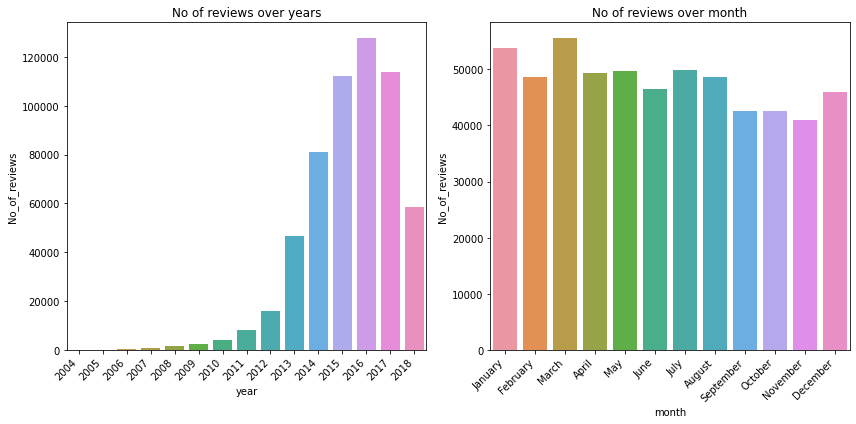

In [142]:
fig = pl.figure( figsize =(12,6) )

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
#Yearly Reviews
yearly = reviews.groupby(['year'])['reviewerID'].count().reset_index()
yearly = yearly.rename(columns={'reviewerID':'No_of_reviews'})
yearChart = sns.barplot(x='year',y='No_of_reviews',data=yearly, ax = ax1)
yearChart.set_title('No of reviews over years')
yearChart.set_xticklabels(yearChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

#Monthly Reviews
monthly = reviews.groupby(['month'])['reviewerID'].count().reset_index()
monthly['month'] = monthly['month'].apply(lambda x : calendar.month_name[x])
monthly = monthly.rename(columns={'reviewerID':'No_of_reviews'})
monthChart = sns.barplot(x='month',y='No_of_reviews',data=monthly, ax = ax2)
monthChart.set_title('No of reviews over month')
monthChart.set_xticklabels(monthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right');
fig.set_tight_layout(True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Overall Ratings')

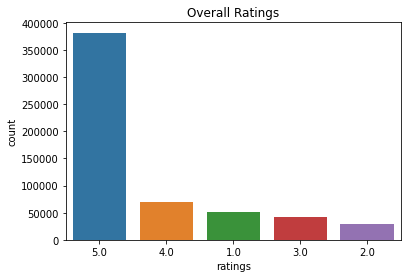

In [32]:
sns.countplot(reviews['ratings'],order=reviews['ratings'].value_counts().index).set_title('Overall Ratings')

# Distribution of overall ratings

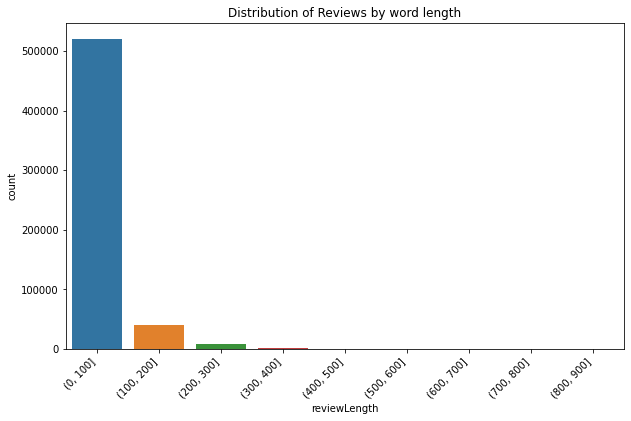

In [33]:
fig = pl.figure( figsize =(10,6) )

#Distribution of word reviews by length
# reviews = reviews[['product_id','reviewerID','reviewerName','reviewText','summary','ratings']]
reviews['reviewLength'] = reviews['reviewText'].apply(lambda x: len(x.split()))

reviews_word_length = reviews.groupby(pd.cut(reviews.reviewLength, np.arange(0,1000,100))).count()
reviews_word_length = reviews_word_length.rename(columns={'reviewLength':'count'})
reviews_word_length = reviews_word_length.reset_index()

reviewLengthChart = sns.barplot(x='reviewLength',y='count',data=reviews_word_length)
reviewLengthChart.set_title('Distribution of Reviews by word length')
reviewLengthChart.set_xticklabels(reviewLengthChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right');



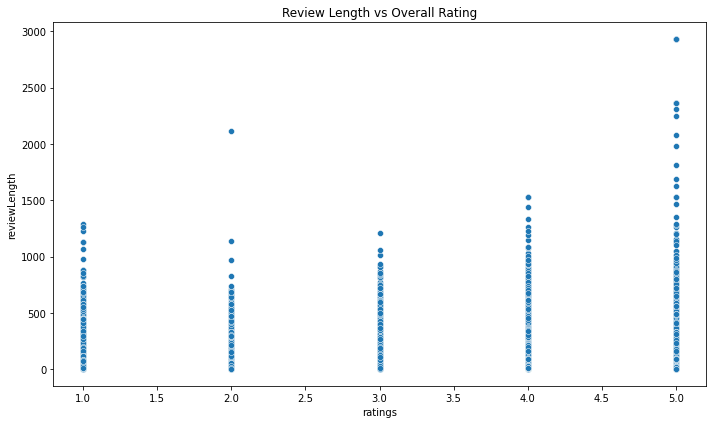

In [34]:

fig = pl.figure( figsize =(10,6) )

#Distribution of length of reviews vs overall rating
reviewLength_vs_Rating = reviews[['product_id','reviewLength','ratings']]
reviewLength_vs_Rating = sns.scatterplot(x='ratings', y='reviewLength', data=reviewLength_vs_Rating)
reviewLength_vs_Rating.set_title('Review Length vs Overall Rating')

fig.set_tight_layout(True)

From the above plot we could see that rating and review are realted to each other.

In [35]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574048 entries, 0 to 574627
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ratings         574048 non-null  float64       
 1   verified        574048 non-null  object        
 2   reviewTime      574048 non-null  datetime64[ns]
 3   reviewerID      574048 non-null  object        
 4   product_id      574048 non-null  object        
 5   reviewerName    574048 non-null  object        
 6   reviewText      574048 non-null  object        
 7   summary         574048 non-null  object        
 8   unixReviewTime  574048 non-null  object        
 9   month           574048 non-null  int64         
 10  year            574048 non-null  int64         
 11  reviewLength    574048 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 76.9+ MB


# Metadata

In [36]:
mreviews.head()

,description,title,also_buy,brand,rank,also_view,product_id
376,['Marvis Jasmin Mint offers a sweet and cool t...,"Marvis Jasmin Mint Toothpaste, 3.8 oz","['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...",Marvis,"4,363 in Beauty & Personal Care (","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",B00063M3EC
377,['Mason Pearson combs are handmade from the fi...,"Mason Pearson Handy Mixed Bristle Brush (BN3),...",[],Mason,"899,303 in Beauty &amp; Personal Care (","['B001N444HW', 'B001N444JK', 'B001N444I6', 'B0...",B000642CHO
378,"[""Want lips that get all the attention they de...",stila Lip Glaze,"['B071JRC1YD', 'B004VQTUVE', 'B007ZUGCL4', 'B0...",stila,"497,559 in Beauty & Personal Care (","['B071HXRCF3', 'B071JR9VSK', 'B00EZ46X2G', 'B0...",B000666CFU
379,['make the daily cleanse more positive with pu...,"Red Flower Japanese Peony Purifying Body Wash,...",[],Red,"587,849 in Beauty & Personal Care (","['B00067WJ42', 'B00067WIY8', 'B0015UVN0K', 'B0...",B00067WIZC
380,['make the daily cleanse more positive with pu...,Red Flower Spanish Gardenia Purifying Body Was...,"['B000BOA3U2', 'B00144JWK0', 'B0015UTZIW', 'B0...",Red,"476,207 in Beauty &amp; Personal Care (","['B00067WJ42', 'B00067WIY8', 'B00067WIZC']",B00067WJ56


            reviewerID  No of reviews
160373  A2GJX2KCUSR0EI            129
365293   AJL6HX8O2QLVO            128
73514   A1O4PNHACFEDEM            125
27166   A18VCM7Y7HK6EW            124
364521   AJC7TSNP5UAWN            124

   No of reviews   count
0              1  324521
1              2   61568
2              3   17990
3              4    5578
4              5    2224


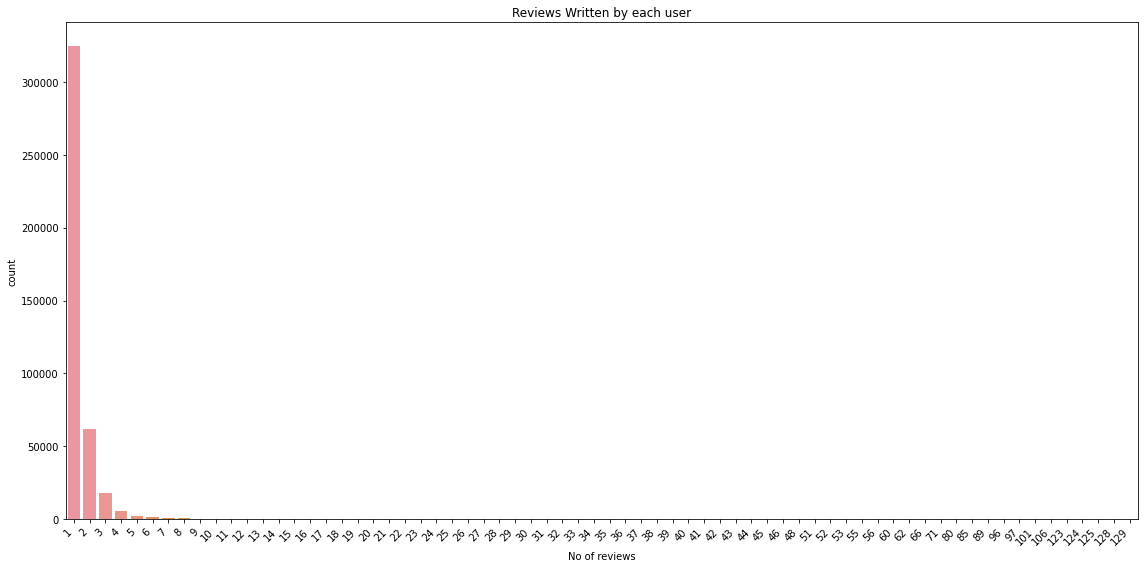

In [37]:



#Distribution of number of reviews written by each user
f = pl.figure( figsize =(16,8) )
userReviews = reviews[['reviewerID','product_id']]
userReviews = userReviews.groupby(['reviewerID']).count().reset_index()
userReviews = userReviews.sort_values('product_id',ascending = False)
userReviews = userReviews.rename(columns={'product_id':'No of reviews'})
print(userReviews.head())

userReviews1 = userReviews.groupby('No of reviews')['reviewerID'].count().reset_index()
userReviews1 = userReviews1.rename(columns={'reviewerID':'count'})
print()
print(userReviews1.head())

userReviewChart = sns.barplot(x = 'No of reviews',y = 'count',data = userReviews1)
userReviewChart.set_title('Reviews Written by each user')
userReviewChart.set_xticklabels(userReviewChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
f.set_tight_layout(True)

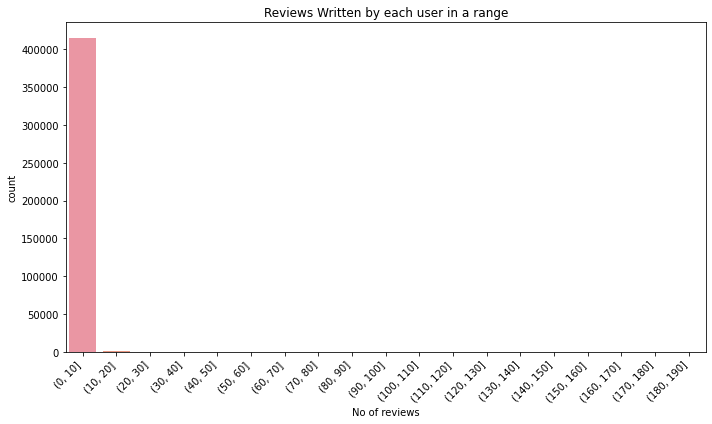

In [38]:
fig = pl.figure( figsize =(10,6) )
userReviews2 = userReviews1.groupby(pd.cut(userReviews1['No of reviews'],np.arange(0,200,10))).sum()
userReviews2 = userReviews2.rename(columns={'No of reviews':'range of reveiws'})
userReviews2 = userReviews2.reset_index()

userReviewChart = sns.barplot(x='No of reviews',y='count',data=userReviews2)
userReviewChart.set_title('Reviews Written by each user in a range')
userReviewChart.set_xticklabels(userReviewChart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
fig.set_tight_layout(True)

In [ ]:
# reviews.reviewerName.replace('NaN','Anonymous')

In [39]:
mreviews.head()

,description,title,also_buy,brand,rank,also_view,product_id
376,['Marvis Jasmin Mint offers a sweet and cool t...,"Marvis Jasmin Mint Toothpaste, 3.8 oz","['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...",Marvis,"4,363 in Beauty & Personal Care (","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",B00063M3EC
377,['Mason Pearson combs are handmade from the fi...,"Mason Pearson Handy Mixed Bristle Brush (BN3),...",[],Mason,"899,303 in Beauty &amp; Personal Care (","['B001N444HW', 'B001N444JK', 'B001N444I6', 'B0...",B000642CHO
378,"[""Want lips that get all the attention they de...",stila Lip Glaze,"['B071JRC1YD', 'B004VQTUVE', 'B007ZUGCL4', 'B0...",stila,"497,559 in Beauty & Personal Care (","['B071HXRCF3', 'B071JR9VSK', 'B00EZ46X2G', 'B0...",B000666CFU
379,['make the daily cleanse more positive with pu...,"Red Flower Japanese Peony Purifying Body Wash,...",[],Red,"587,849 in Beauty & Personal Care (","['B00067WJ42', 'B00067WIY8', 'B0015UVN0K', 'B0...",B00067WIZC
380,['make the daily cleanse more positive with pu...,Red Flower Spanish Gardenia Purifying Body Was...,"['B000BOA3U2', 'B00144JWK0', 'B0015UTZIW', 'B0...",Red,"476,207 in Beauty &amp; Personal Care (","['B00067WJ42', 'B00067WIY8', 'B00067WIZC']",B00067WJ56


In [40]:
reviews_merged = reviews.merge(mreviews, on='product_id')

In [41]:
reviews_merged.head()

,ratings,verified,reviewTime,reviewerID,product_id,reviewerName,reviewText,summary,unixReviewTime,month,year,reviewLength,description,title,also_buy,brand,rank,also_view
0,5.0,True,2010-11-01,A11LNPG39A2ZV4,B00063M3EC,Kristi Swede,"I've been using&nbsp;<a data-hook=""product-lin...",Love my Marvis!,1288569600,11,2010,105,['Marvis Jasmin Mint offers a sweet and cool t...,"Marvis Jasmin Mint Toothpaste, 3.8 oz","['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...",Marvis,"4,363 in Beauty & Personal Care (","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0..."
1,5.0,False,2010-01-06,A1VUN4JU731CBH,B00063M3EC,YesandNo,I had seen the Marvis toothpastes before and a...,Very Yummy Taste,1262736000,1,2010,258,['Marvis Jasmin Mint offers a sweet and cool t...,"Marvis Jasmin Mint Toothpaste, 3.8 oz","['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...",Marvis,"4,363 in Beauty & Personal Care (","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0..."
2,5.0,True,2009-07-15,A2CBVSJ1OV2Q4S,B00063M3EC,Jena Joyce,I buy the Jasmine Marvis Toothpaste because it...,Classy Toothpaste,1247616000,7,2009,80,['Marvis Jasmin Mint offers a sweet and cool t...,"Marvis Jasmin Mint Toothpaste, 3.8 oz","['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...",Marvis,"4,363 in Beauty & Personal Care (","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0..."
3,5.0,True,2008-08-11,A34XM0ECYBB4DH,B00063M3EC,T. Garrad,This toothpaste is the best I've ever tried. ...,You must own this!,1218412800,8,2008,18,['Marvis Jasmin Mint offers a sweet and cool t...,"Marvis Jasmin Mint Toothpaste, 3.8 oz","['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...",Marvis,"4,363 in Beauty & Personal Care (","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0..."
4,5.0,False,2008-02-10,A2PMRY7ADA8WJ2,B00063M3EC,arctat,i didn't know what i was missing until i tried...,a delightful luxury,1202601600,2,2008,71,['Marvis Jasmin Mint offers a sweet and cool t...,"Marvis Jasmin Mint Toothpaste, 3.8 oz","['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...",Marvis,"4,363 in Beauty & Personal Care (","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0..."


In [42]:
reviews = reviews_merged[['reviewerID','product_id','reviewerName','reviewText','ratings','summary','title','description','also_buy','also_view','year','brand','reviewLength']].copy()

In [43]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547894 entries, 0 to 547893
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   reviewerID    547894 non-null  object 
 1   product_id    547894 non-null  object 
 2   reviewerName  547894 non-null  object 
 3   reviewText    547894 non-null  object 
 4   ratings       547894 non-null  float64
 5   summary       547894 non-null  object 
 6   title         547894 non-null  object 
 7   description   547894 non-null  object 
 8   also_buy      547894 non-null  object 
 9   also_view     547894 non-null  object 
 10  year          547894 non-null  int64  
 11  brand         547894 non-null  object 
 12  reviewLength  547894 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 58.5+ MB


In [44]:
reviews.head()

,reviewerID,product_id,reviewerName,reviewText,ratings,summary,title,description,also_buy,also_view,year,brand,reviewLength
0,A11LNPG39A2ZV4,B00063M3EC,Kristi Swede,"I've been using&nbsp;<a data-hook=""product-lin...",5.0,Love my Marvis!,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2010,Marvis,105
1,A1VUN4JU731CBH,B00063M3EC,YesandNo,I had seen the Marvis toothpastes before and a...,5.0,Very Yummy Taste,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2010,Marvis,258
2,A2CBVSJ1OV2Q4S,B00063M3EC,Jena Joyce,I buy the Jasmine Marvis Toothpaste because it...,5.0,Classy Toothpaste,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2009,Marvis,80
3,A34XM0ECYBB4DH,B00063M3EC,T. Garrad,This toothpaste is the best I've ever tried. ...,5.0,You must own this!,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2008,Marvis,18
4,A2PMRY7ADA8WJ2,B00063M3EC,arctat,i didn't know what i was missing until i tried...,5.0,a delightful luxury,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2008,Marvis,71


In [45]:
#merge the title and selftext column
reviews['reviewcomb'] = reviews['reviewText'] + ' ' + reviews['summary']

In [46]:
reviews

,reviewerID,product_id,reviewerName,reviewText,ratings,summary,title,description,also_buy,also_view,year,brand,reviewLength,reviewcomb
0,A11LNPG39A2ZV4,B00063M3EC,Kristi Swede,"I've been using&nbsp;<a data-hook=""product-lin...",5.0,Love my Marvis!,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2010,Marvis,105,"I've been using&nbsp;<a data-hook=""product-lin..."
1,A1VUN4JU731CBH,B00063M3EC,YesandNo,I had seen the Marvis toothpastes before and a...,5.0,Very Yummy Taste,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2010,Marvis,258,I had seen the Marvis toothpastes before and a...
2,A2CBVSJ1OV2Q4S,B00063M3EC,Jena Joyce,I buy the Jasmine Marvis Toothpaste because it...,5.0,Classy Toothpaste,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2009,Marvis,80,I buy the Jasmine Marvis Toothpaste because it...
3,A34XM0ECYBB4DH,B00063M3EC,T. Garrad,This toothpaste is the best I've ever tried. ...,5.0,You must own this!,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2008,Marvis,18,This toothpaste is the best I've ever tried. ...
4,A2PMRY7ADA8WJ2,B00063M3EC,arctat,i didn't know what i was missing until i tried...,5.0,a delightful luxury,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2008,Marvis,71,i didn't know what i was missing until i tried...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547889,A37M9GZV5PMABX,B01HIQCSBC,Amazon Customer,"the colour is too dark,",2.0,Two Stars,"CND Shellac, Brick Knit",['CND Shellac was designed to be used as a sys...,"['B003ONLAXQ', 'B003OH0KBA', 'B00R3PZK14', 'B0...","['B00D2VMUA2', 'B004N2SQUC', 'B074KBT2NM', 'B0...",2016,CND,5,"the colour is too dark, Two Stars"
547890,A256VO0MCZSDGE,B01HIQCSBC,broken fingernail,Color is just okay. I find the Shellac polish...,3.0,Shellac just fair,"CND Shellac, Brick Knit",['CND Shellac was designed to be used as a sys...,"['B003ONLAXQ', 'B003OH0KBA', 'B00R3PZK14', 'B0...","['B00D2VMUA2', 'B004N2SQUC', 'B074KBT2NM', 'B0...",2016,CND,108,Color is just okay. I find the Shellac polish...
547891,A2VVJW6PY48A9M,B01HIQCSBC,Mrs J Cargill,"Great product, PERFECT SHADE!! :)",5.0,Love the deep red color!,"CND Shellac, Brick Knit",['CND Shellac was designed to be used as a sys...,"['B003ONLAXQ', 'B003OH0KBA', 'B00R3PZK14', 'B0...","['B00D2VMUA2', 'B004N2SQUC', 'B074KBT2NM', 'B0...",2016,CND,5,"Great product, PERFECT SHADE!! :) Love the de..."
547892,A23DRCOMC2RIXF,B01HJ2UY0W,Y.Y. Chen,"The perfume is good, but the spray head broke ...",1.0,Spray head broke off within a month,"Juicy Couture I Love Juicy Couture, 1.7 fl. Oz...",['The I AM JUICY COUTURE girl is once again ta...,[],"['B0757439SY', 'B01HJ2UY1G', 'B01KX3TK7C', 'B0...",2016,Juicy,10,"The perfume is good, but the spray head broke ..."


In [47]:
len(reviews)

547894

# Product Feature

Text(0, 0.5, 'Number of Reviews')

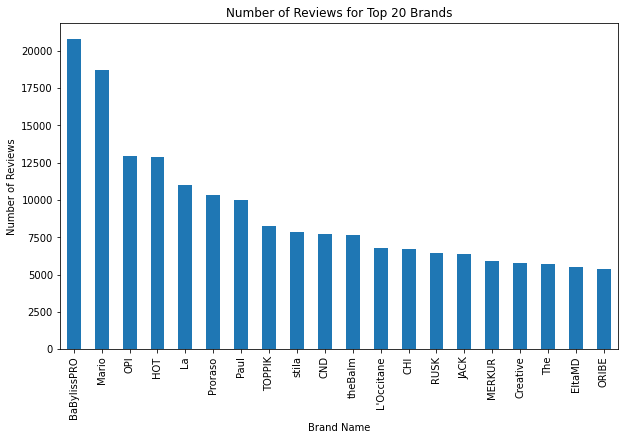

In [49]:
## PLOT NUMBER OF REVIEWS FOR TOP 20 BRANDS  
brands = reviews["brand"].value_counts()
pl.figure( figsize =(10,6) )
brands[:20].plot(kind='bar')
pl.title("Number of Reviews for Top 20 Brands")
pl.xlabel('Brand Name')
pl.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

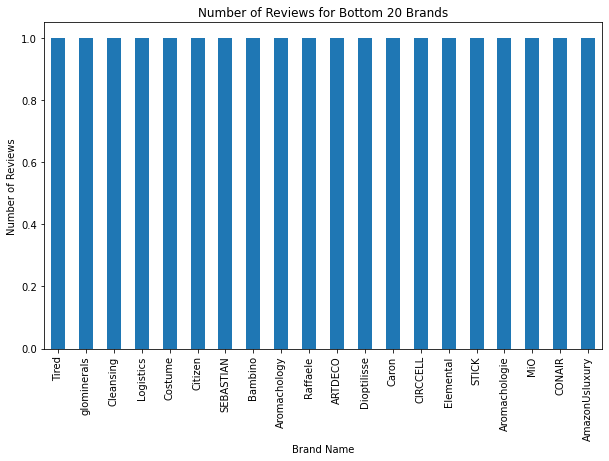

In [50]:
## PLOT NUMBER OF REVIEWS FOR bottom 20 BRANDS  
brands = reviews["brand"].value_counts()
pl.figure( figsize =(10,6) )
brands[-20:].plot(kind='bar')
pl.title("Number of Reviews for Bottom 20 Brands")
pl.xlabel('Brand Name')
pl.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

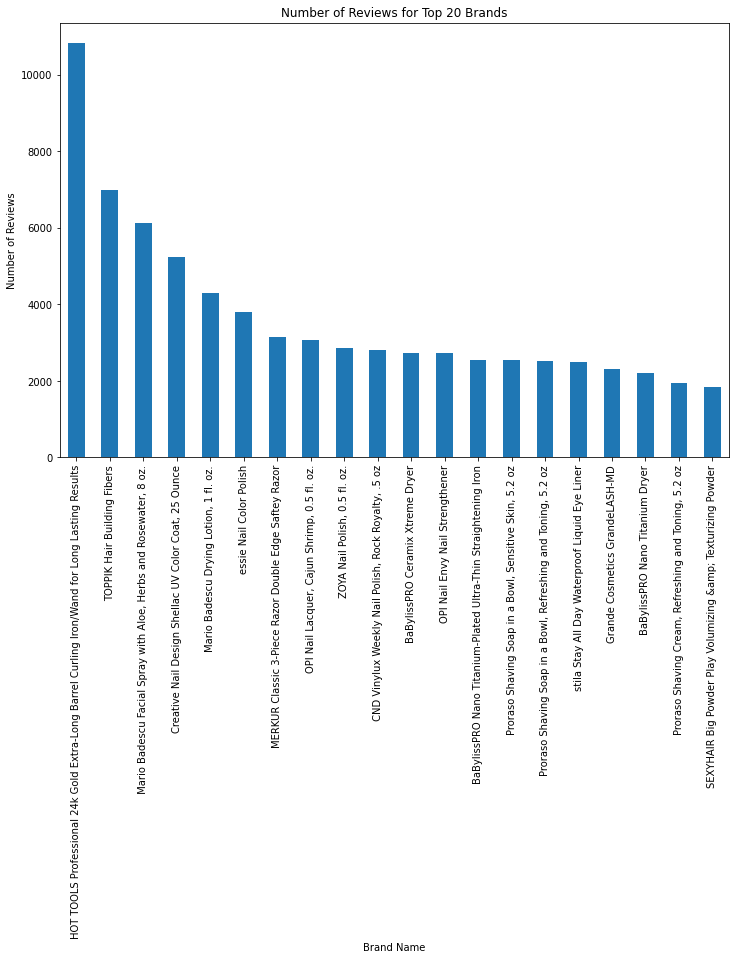

In [51]:
## PLOT NUMBER OF REVIEWS FOR top 20 Products 
products = reviews["title"].value_counts()
pl.figure(figsize=(12,8))
products[:20].plot(kind='bar')
pl.title("Number of Reviews for Top 20 Brands")
pl.xlabel('Brand Name')
pl.ylabel('Number of Reviews')

# Low rating and reviews

In [52]:
products = reviews["title"].value_counts()
products

HOT TOOLS Professional 24k Gold Extra-Long Barrel Curling Iron/Wand for Long Lasting Results    10823
TOPPIK Hair Building Fibers                                                                      6984
 Mario Badescu Facial Spray with Aloe, Herbs and Rosewater, 8 oz.                                6126
Creative Nail Design Shellac UV Color Coat, 25 Ounce                                             5246
Mario Badescu Drying Lotion, 1 fl. oz.                                                           4298
                                                                                                ...  
butter LONDON Nail Lacquer, Yellow &amp; Gold Shades, Jasper                                        1
Zoya Nail Polish, ZP294 Venus, 0.5 Ounce (Pack of 6)                                                1
Floris London Rose Geranium Luxury Soap, 3.4 oz                                                     1
Kahina Giving Beauty Face Cream                                                   

In [53]:
review_low = reviews[reviews['ratings']<2][['title']].head(5)
review_low

,title
5,"Marvis Jasmin Mint Toothpaste, 3.8 oz"
6,"Marvis Jasmin Mint Toothpaste, 3.8 oz"
12,"Marvis Jasmin Mint Toothpaste, 3.8 oz"
28,"Marvis Jasmin Mint Toothpaste, 3.8 oz"
29,"Marvis Jasmin Mint Toothpaste, 3.8 oz"


In [54]:
review_l = reviews[(reviews['product_id']=='B00063M3EC')]
review_l

,reviewerID,product_id,reviewerName,reviewText,ratings,summary,title,description,also_buy,also_view,year,brand,reviewLength,reviewcomb
0,A11LNPG39A2ZV4,B00063M3EC,Kristi Swede,"I've been using&nbsp;<a data-hook=""product-lin...",5.0,Love my Marvis!,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2010,Marvis,105,"I've been using&nbsp;<a data-hook=""product-lin..."
1,A1VUN4JU731CBH,B00063M3EC,YesandNo,I had seen the Marvis toothpastes before and a...,5.0,Very Yummy Taste,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2010,Marvis,258,I had seen the Marvis toothpastes before and a...
2,A2CBVSJ1OV2Q4S,B00063M3EC,Jena Joyce,I buy the Jasmine Marvis Toothpaste because it...,5.0,Classy Toothpaste,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2009,Marvis,80,I buy the Jasmine Marvis Toothpaste because it...
3,A34XM0ECYBB4DH,B00063M3EC,T. Garrad,This toothpaste is the best I've ever tried. ...,5.0,You must own this!,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2008,Marvis,18,This toothpaste is the best I've ever tried. ...
4,A2PMRY7ADA8WJ2,B00063M3EC,arctat,i didn't know what i was missing until i tried...,5.0,a delightful luxury,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2008,Marvis,71,i didn't know what i was missing until i tried...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,A1N1Q47ME80K8S,B00063M3EC,J. Web,It leaves a gross feeling film over your teeth,2.0,"Nice flavor, gross feeling","Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2018,Marvis,9,It leaves a gross feeling film over your teeth...
422,AIWWFITCTPQ3,B00063M3EC,Amazon Customer,At first I was skeptical lavender mint toothpa...,5.0,... mint toothpaste after a few days I am in l...,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2018,Marvis,16,At first I was skeptical lavender mint toothpa...
423,A2G14L10PWTB2S,B00063M3EC,D. Kelley,This toothpaste is so yummy that it almost mak...,5.0,Unique flavor is really nice!,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2018,Marvis,26,This toothpaste is so yummy that it almost mak...
424,A1GIRF58JTOR1G,B00063M3EC,kyle wiles,I didn't think it would be as flowery as it wa...,2.0,Tasted like perfume,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2018,Marvis,17,I didn't think it would be as flowery as it wa...


In [55]:
print(review_l['reviewcomb'][28])

Horrible flavor. One Star


# Number of Reviewers and products

In [56]:
reviews.ratings.unique()

array([5., 1., 4., 2., 3.])

In [120]:

#DESCRIPTIVE STATISTICS
print ("================================================")

# Total reviews
total = len(reviews)
print ("Number of reviews: ",total)
print ()

# How many unique reviewers?
print ("Number of unique reviewers: ",len(reviews.reviewerID.unique()))
reviewer_prop = float(len(reviews.reviewerID.unique())/total)
print ("Proportion of unique reviewers: ",round(reviewer_prop,3))
print ()

# How many unique products?
print ("Number of unique products: ", len(reviews.title.unique()))
product_prop = float(len(reviews.title.unique())/total)
print ("Proportion of unique products: ",round(product_prop,3))
print ()

# Average star score
print ("Average rating score: ",round(reviews.ratings.mean()))

# Review number per unique customer
print('\nReview per customer: {}'.format((len(reviews)/len(reviews['reviewerID'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(reviews)/len(reviews['title'].unique()))))


print ("================================================")

Number of reviews:  547894

Number of unique reviewers:  403783
Proportion of unique reviewers:  0.737

Number of unique products:  11553
Proportion of unique products:  0.021

Average rating score:  4

Review per customer: 1.356902098404341

Review per product: 47.4243919328313


In [57]:
good_rate = len(reviews[reviews['ratings'] >= 3])
bad_rate = len(reviews[reviews['ratings'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for Beauty products'.format(good_rate))
print ('Bad ratings : {} reviews for Beauty products'.format(bad_rate))


Good ratings : 471662 reviews for Beauty products
Bad ratings : 76232 reviews for Beauty products


In [58]:
review_grouped = reviews.groupby(['reviewerID']).agg({'product_id': 'count'}).reset_index()

In [59]:
review_grouped

,reviewerID,product_id
0,A0002708WFPIPQT73GK8,1
1,A0010876CNE3ILIM9HV0,1
2,A0026756LXIAIU5P6JUI,1
3,A0036810AKGSUKHOLV23,1
4,A004163085WKABQBPDOX,1
...,...,...
403778,AZZYUA6JI1MO0,2
403779,AZZYW4YOE1B6E,3
403780,AZZZ27Q95ZU80,1
403781,AZZZ3LGTCGUZF,1


In [60]:
grouped_sum = review_grouped['product_id'].sum()
review_grouped['percentage']  = review_grouped['product_id'].div(grouped_sum)*100
review_grouped.sort_values(['product_id'], ascending = False)

,reviewerID,product_id,percentage
354738,AJL6HX8O2QLVO,128,0.023362
155740,A2GJX2KCUSR0EI,125,0.022815
71412,A1O4PNHACFEDEM,125,0.022815
353995,AJC7TSNP5UAWN,124,0.022632
5835,A11Z3ANM4PQFMH,124,0.022632
...,...,...,...
150450,A2ER2ETSBI9FDO,1,0.000183
150449,A2ER2ECH7MC8D0,1,0.000183
150447,A2ER26F1P05I1I,1,0.000183
150446,A2ER1U5LWV08Y5,1,0.000183


In [61]:
word_count=[]
for st in reviews.reviewcomb:
    word_count.append(len(str(st).split()))

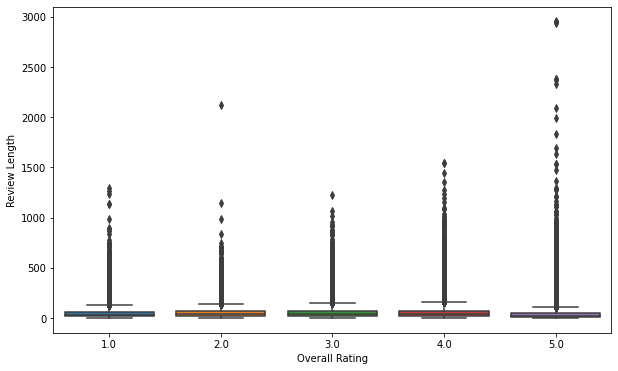

In [62]:
pl.figure( figsize =(10,6) )
sns.boxplot(x="ratings",y=word_count,data=reviews)
pl.xlabel('Overall Rating')
pl.ylabel('Review Length')

pl.show()

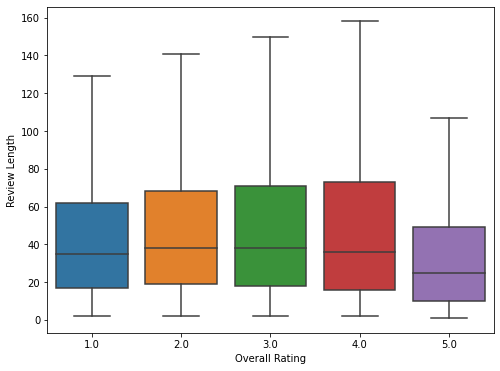

In [63]:
#Since there are outliers in the above boxplot we are not able to clearly visualize. So will remove the outliers 
pl.figure(figsize = (8,6))

sns.boxplot(x="ratings",y=word_count,data=reviews,showfliers=False)
pl.xlabel('Overall Rating')
pl.ylabel('Review Length')

pl.show()

#  Features

Text(0, 0.5, 'Number of Reviews')

<Figure size 1080x576 with 0 Axes>

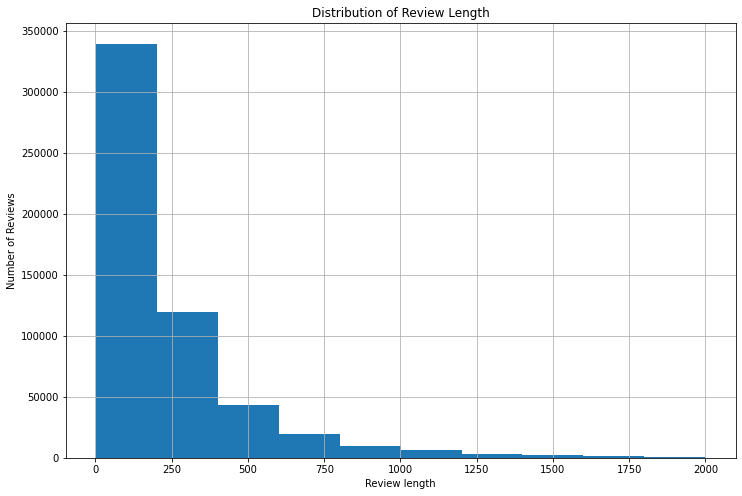

In [64]:

#PLOT DISTRIBUTION OF REVIEW LENGTH   

pl.figure(figsize = (15,8))
# reviews['reviewcomb'].str.len().plot.hist()
review_length = reviews["reviewcomb"].map(lambda x: len(x))
pl.figure(figsize=(12,8))
review_length.loc[review_length < 2000].hist()
pl.title("Distribution of Review Length")
pl.xlabel('Review length')
pl.ylabel('Number of Reviews')

In [130]:
# reviews.to_csv('gdrive/My Drive/Capstone_project/data/reviews_cleaned.csv',sep=',', index=False)

# Data Preprocessing

In [65]:
def clean_data(rev): 
    
    review_text = BeautifulSoup(rev).get_text()
    # Remove url.
    removed_url = re.sub(r"http\S+", "", review_text)
   
    #Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", removed_url)
    
    #Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # convert the stopwords to a set.
    stops = set(stopwords.words('english'))
    
    #Remove stopwords.
    meaningful_words = [w for w in words if w not in stops]

    words=[]
    for word in meaningful_words:
        words.append(english_stemmer.stem(word))

    
    return(words)

In [66]:
clean_reviewdata = []
for rev in reviews['reviewcomb']:
    clean_reviewdata.append( " ".join(clean_data(rev)))

In [67]:
clean_reviewdata

['use marvi classic strong mint toothpast year realli love teeth breath new treat decid tri jasmin mint flavor delici jasmin subtl sweet floweri realli beauti complement mint would nice man woman anyon think reason price everyday luxuri light periwinkl tube almost delici flavor anoth subtl touch marvi mmmmm old toothpast commerci use say love marvi',
 'seen marvi toothpast alway wonder world anyon would spend whop dollar toothpast recent order place web includ tini sampl tube origin marvi classic strong mint toothpast everi night day found reach one rather old toothpast shall remain unnam love strong mint flavor overal clean fresh feel mouth intrigu went googl marvi found jasmin mint flavor bit skeptic order smaller travel size case like seem like strang combin floweri minti howev happi report truli great flavor mint quit strong origin well sinc enabl tast bud actual notic jasmin tast exact like jasmin tea perfect balanc mint icki yucki strang artifici extrem pleasant wonder uniqu woul

In [68]:
reviews['clean_text'] = clean_reviewdata

### Clean Title 

In [77]:
clean_title = []
for rev in reviews['title']:
    clean_title.append( " ".join(clean_data(rev)))

In [78]:
clean_title

['marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint toothpast oz',
 'marvi jasmin mint 

In [79]:
reviews['clean_title'] = clean_title

In [80]:
reviews.head(2)

,reviewerID,product_id,reviewerName,reviewText,ratings,summary,title,description,also_buy,also_view,year,brand,reviewLength,reviewcomb,clean_text,clean_title
0,A11LNPG39A2ZV4,B00063M3EC,Kristi Swede,"I've been using&nbsp;<a data-hook=""product-lin...",5.0,Love my Marvis!,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2010,Marvis,105,"I've been using&nbsp;<a data-hook=""product-lin...",use marvi classic strong mint toothpast year r...,marvi jasmin mint toothpast oz
1,A1VUN4JU731CBH,B00063M3EC,YesandNo,I had seen the Marvis toothpastes before and a...,5.0,Very Yummy Taste,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2010,Marvis,258,I had seen the Marvis toothpastes before and a...,seen marvi toothpast alway wonder world anyon ...,marvi jasmin mint toothpast oz


In [81]:
clean_descdata = []
for rev in reviews['description']:
    clean_descdata.append( " ".join(clean_data(rev)))

In [82]:
reviews['clean_description'] = clean_descdata

In [83]:
reviews.isnull().sum()

reviewerID           0
product_id           0
reviewerName         0
reviewText           0
ratings              0
summary              0
title                0
description          0
also_buy             0
also_view            0
year                 0
brand                0
reviewLength         0
reviewcomb           0
clean_text           0
clean_title          0
clean_description    0
dtype: int64

In [86]:

#Trains a model whose vectors size is 5000, composed by the main unigrams and bigrams found in the corpus, ignoring stopwords
vectorizer = TfidfVectorizer(analyzer='word',
                     ngram_range=(1, 2),
                     min_df=0.003,
                     max_df=0.5,
                     max_features=5000,
                     stop_words='english')

item_ids = reviews['title'].tolist()
tfidf_matrix = vectorizer.fit_transform(reviews['description']) #vectorise description
tfidf_feature_names = vectorizer.get_feature_names()
tfidf_matrix

<547894x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 51036644 stored elements in Compressed Sparse Row format>

In [92]:
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf.fit(tfidf_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [93]:
pyLDAvis.sklearn.prepare(lda_tfidf, tfidf_matrix, vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10     0.098785 -0.113428       1        1  8.147744
11     0.073006 -0.193298       2        1  7.471152
4      0.150502 -0.072836       3        1  6.951610
5     -0.213426  0.026280       4        1  6.788927
13     0.168686  0.011751       5        1  6.510347
19    -0.169676 -0.020746       6        1  6.475897
17     0.070041 -0.179402       7        1  6.136635
9      0.194623  0.196696       8        1  5.719401
3     -0.038545 -0.047596       9        1  5.199520
1      0.118830  0.319482      10        1  4.940693
18    -0.234328 -0.049963      11        1  4.798600
6     -0.195896 -0.059610      12        1  4.009856
14    -0.189841 -0.020672      13        1  3.709613
7     -0.218012  0.197847      14        1  3.704325
8      0.105765  0.019684      15        1  3.702086
12    -0.136611  0.121446      16        1  3.572092
0      0.167520  0.170881      17        1  3.397229
15     0.103155 -0.130439      18        1  3.255445
2      0.051371 -0.060766      19        1  2.895452
16     0.094051 -0.115314      20        1  2.613376, topic_info=          Term          Freq         Total Category  logprob  loglift
2836     media  24635.000000  24635.000000  Default  30.0000  30.0000
2090      hair  25438.000000  25438.000000  Default  29.0000  29.0000
2307    images  15743.000000  15743.000000  Default  28.0000  28.0000
2979      nail  11077.000000  11077.000000  Default  27.0000  27.0000
951         ci   5814.000000   5814.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
4049      skin   1354.022922  25513.046955  Topic20  -4.3871   0.7084
2047  glycolic    600.001076   1816.980572  Topic20  -5.2010   2.5365
2786  manicure    588.627417   1633.173476  Topic20  -5.2201   2.6240
4969     years    621.366436   3762.314879  Topic20  -5.1660   1.8437
4252     spray    624.515057   4947.824899  Topic20  -5.1609   1.5748

[1392 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
4         6  0.001248                  01
4        13  0.818480                  01
4        19  0.179666                  01
5        19  0.998309            01 aplus
6        13  0.999277  01 aplusautomation
...     ...       ...                 ...
4995      6  0.930411                zoya
4995     14  0.044452                zoya
4996      6  0.997849           zoya best
4997      6  0.992256        zoya focuses
4999      6  0.993878         zoya remove

[4913 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 12, 5, 6, 14, 20, 18, 10, 4, 2, 19, 7, 15, 8, 9, 13, 1, 16, 3, 17])

In [96]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    pl.figure( figsize =(10,6) )
    # Display image
    pl.imshow(wordcloud) 
    # No axis details
    pl.axis("off");

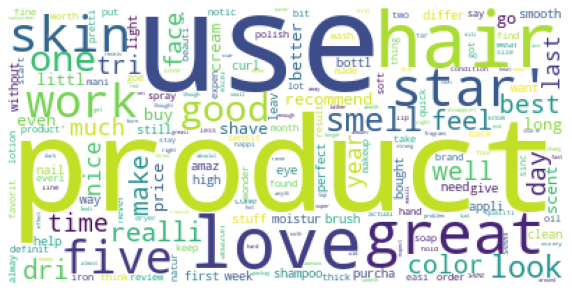

In [97]:
# Generate word cloud for Review text
wordcloud = WordCloud(background_color='white',max_words=200,  collocations=False, stopwords = STOPWORDS).generate(str(clean_reviewdata))
# Plot
plot_cloud(wordcloud)

In [98]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547894 entries, 0 to 547893
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   reviewerID         547894 non-null  object 
 1   product_id         547894 non-null  object 
 2   reviewerName       547894 non-null  object 
 3   reviewText         547894 non-null  object 
 4   ratings            547894 non-null  float64
 5   summary            547894 non-null  object 
 6   title              547894 non-null  object 
 7   description        547894 non-null  object 
 8   also_buy           547894 non-null  object 
 9   also_view          547894 non-null  object 
 10  year               547894 non-null  int64  
 11  brand              547894 non-null  object 
 12  reviewLength       547894 non-null  int64  
 13  reviewcomb         547894 non-null  object 
 14  clean_text         547894 non-null  object 
 15  clean_title        547894 non-null  object 
 16  cl

In [99]:
reviews1 = reviews.drop_duplicates(subset=['reviewText','summary'])

In [100]:
reviews1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464829 entries, 0 to 547892
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   reviewerID         464829 non-null  object 
 1   product_id         464829 non-null  object 
 2   reviewerName       464829 non-null  object 
 3   reviewText         464829 non-null  object 
 4   ratings            464829 non-null  float64
 5   summary            464829 non-null  object 
 6   title              464829 non-null  object 
 7   description        464829 non-null  object 
 8   also_buy           464829 non-null  object 
 9   also_view          464829 non-null  object 
 10  year               464829 non-null  int64  
 11  brand              464829 non-null  object 
 12  reviewLength       464829 non-null  int64  
 13  reviewcomb         464829 non-null  object 
 14  clean_text         464829 non-null  object 
 15  clean_title        464829 non-null  object 
 16  cl

# Sentiment Analysis

Sentiment Analysis is the automated process of understanding the sentiment or opinion of a given text. This machine learning tool can provide insights by automatically analyzing product reviews and separating them into tags: Positive, Neutral, Negative.

# 4.1. Classifying reviews based on sentiment using Textblob


In [104]:
from textblob import TextBlob

# pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

# reviews1['polarity'] = reviews1['reviewcomb'].apply(pol)
reviews1['subjectivity'] = reviews1['reviewcomb'].apply(sub)
reviews1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,reviewerID,product_id,reviewerName,reviewText,ratings,summary,title,description,also_buy,also_view,year,brand,reviewLength,reviewcomb,clean_text,clean_title,clean_description,polarity,subjectivity
0,A11LNPG39A2ZV4,B00063M3EC,Kristi Swede,"I've been using&nbsp;<a data-hook=""product-lin...",5.0,Love my Marvis!,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2010,Marvis,105,"I've been using&nbsp;<a data-hook=""product-lin...",use marvi classic strong mint toothpast year r...,marvi jasmin mint toothpast oz,marvi jasmin mint offer sweet cool touch mint ...,0.309612,0.622159
1,A1VUN4JU731CBH,B00063M3EC,YesandNo,I had seen the Marvis toothpastes before and a...,5.0,Very Yummy Taste,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2010,Marvis,258,I had seen the Marvis toothpastes before and a...,seen marvi toothpast alway wonder world anyon ...,marvi jasmin mint toothpast oz,marvi jasmin mint offer sweet cool touch mint ...,0.234115,0.524702
2,A2CBVSJ1OV2Q4S,B00063M3EC,Jena Joyce,I buy the Jasmine Marvis Toothpaste because it...,5.0,Classy Toothpaste,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2009,Marvis,80,I buy the Jasmine Marvis Toothpaste because it...,buy jasmin marvi toothpast uniqu floral scent ...,marvi jasmin mint toothpast oz,marvi jasmin mint offer sweet cool touch mint ...,0.301515,0.668182
3,A34XM0ECYBB4DH,B00063M3EC,T. Garrad,This toothpaste is the best I've ever tried. ...,5.0,You must own this!,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2008,Marvis,18,This toothpaste is the best I've ever tried. ...,toothpast best ever tri tast realli good light...,marvi jasmin mint toothpast oz,marvi jasmin mint offer sweet cool touch mint ...,0.694000,0.762000
4,A2PMRY7ADA8WJ2,B00063M3EC,arctat,i didn't know what i was missing until i tried...,5.0,a delightful luxury,"Marvis Jasmin Mint Toothpaste, 3.8 oz",['Marvis Jasmin Mint offers a sweet and cool t...,"['B007XD6A0Q', 'B001RUXR2K', 'B0006PKIQA', 'B0...","['B00NU9HM3G', 'B06XDN5N7L', 'B00154XM4Q', 'B0...",2008,Marvis,71,i didn't know what i was missing until i tried...,know miss tri toothpast make other tast artifi...,marvi jasmin mint toothpast oz,marvi jasmin mint offer sweet cool touch mint ...,0.187202,0.553571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547888,A2HPJMRRTYJ2M9,B01HIQCSBC,RJL,CND Shellac Power Polish is wonderful! This co...,5.0,Shellac Polish that covers,"CND Shellac, Brick Knit",['CND Shellac was designed to be used as a sys...,"['B003ONLAXQ', 'B003OH0KBA', 'B00R3PZK14', 'B0...","['B00D2VMUA2', 'B004N2SQUC', 'B074KBT2NM', 'B0...",2016,CND,19,CND Shellac Power Polish is wonderful! This co...,cnd shellac power polish wonder color brick kn...,cnd shellac brick knit,cnd shellac design use system featur base coat...,0.926667,1.000000
547889,A37M9GZV5PMABX,B01HIQCSBC,Amazon Customer,"the colour is too dark,",2.0,Two Stars,"CND Shellac, Brick Knit",['CND Shellac was designed to be used as a sys...,"['B003ONLAXQ', 'B003OH0KBA', 'B00R3PZK14', 'B0...","['B00D2VMUA2', 'B004N2SQUC', 'B074KBT2NM', 'B0...",2016,CND,5,"the colour is too dark, Two Stars",colour dark two star,cnd shellac brick knit,cnd shellac design use system featur base coat...,-0.150000,0.400000
547890,A256VO0MCZSDGE,B01HIQCSBC,broken fingernail,Color is just okay. I find the Shellac polish...,3.0,Shellac just fair,"CND Shellac, Brick Knit",['CND Shellac was designed to be used as a sys..

In [105]:
pd.set_option('display.max_colwidth', None)
reviews1[['reviewcomb','polarity','subjectivity']].tail(20)

,reviewcomb,polarity,subjectivity
547872,I mostly got this to try the Divine line of face moisturizers before buying the full size ones and was disappointed that they came in little sample packets instead of tubes or jars. If I had realized I probably wouldn't have bought this. On the other hand I am glad I did get the sample pack because now I know I hate the smell of the lotions!!!! It smells like powder trying to cover up an old or rotten smell. Not for me,-0.076563,0.596875
547873,Perfect assortment of creams and lotions. Wish I had gotten a couple more of these 20 piece Summer Treat sets. Great gift idea and would lift up any ones spirits who received this wonderful assortment!!! Perfect assortment of creams and lotions,0.860000,0.850000
547874,"If you find fragrance sprays a little overpowering, these are so nice to feel refreshed, clean and nicely scented. I am a L'Occitane fan, and love the fresh scents. Perfect, great for a ligther clean scent than overpowering perfume. Fresh.",0.464583,0.725000
547875,These freshening toilettes make my day. Cleanses well but gentle to my skin. I love the scent of lemon verbena. Great for traveling or as a hospital patient gift. Easy to open and store packaging that travels well. A breathe of summer all year long,0.313889,0.647222
547876,I absolutely love this product. It is light and fragrant. Smells like a fresh flower. Highly recommend! Light fragrant body oil,0.360000,0.608000
547877,Very nice body oil. Five Stars,0.780000,1.000000
547878,Scent is wonderful Five Stars,1.000000,1.000000
547879,This makes you feel so good! Love it Five Stars,0.687500,0.600000
547881,DO NOT BUY!! I bought the mit to help spread the self tanner and it left awful streaks as well as fuzz all over where I used the mit. The mit was literally shedding. The mit was also so abracive it made my skin peel on top of discoloring my skin because of the self tanner. Im a blotchy mess. This does not go on smoothe or even and the mit leaves streaks. Youve been warned Applicator Leaves streaks and fuzz,-0.168750,0.418750
547882,nice enough hair,0.300000,0.750000


In [106]:
reviews1.to_csv('gdrive/My Drive/Capstone_project/data/reviews_preprocessed.csv',sep=',', index=False)